<a href="https://colab.research.google.com/github/Muhammad-Tayyab-Bhutto/Data-Science-Exercises/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment#01 description
Two datasets are provided for this assignment names (Assignment01_Dataset01.csv & Assignment01_Dataset02.csv). These datasets contains information about the Scientific Journal Indexing body Scopus. Scopus accept journal titles each year and index them in Scopus, in same way they discontinue bad perform journals. Assignment01_Dataset01.csv is about those journals that are listed in September 2023 in Scopus index. Use this dataset and solve following tasks:




### Task 01:
Go through the dataset Assignment01_Dataset01.csv and list all bad data issues with supporting python code for showing the presence of that data quality issue.


In [187]:
import pandas as pd
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
file_path = '/content/drive/MyDrive/DataScience /DataSets/Assignment01_Dataset01.xlsx'

df = pd.read_excel(file_path)


In [190]:
print(df.shape)

(44049, 52)


## Removing Empty Cells

In [191]:
df.head()


,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Coverage,Titles discontinued by Scopus due to quality issues,Article language in source (three-letter ISO language codes),Medline-sourced Title? (See additional details under separate tab.),Open Access status,...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
0,18500162600,21st Century Music,15343219,NaN,Inactive,2002-2011,NaN,ENG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21100404576,2D Materials,NaN,20531583,Active,2014-ongoing,NaN,ENG,NaN,NaN,...,NaN,NaN,NaN,NaN,Physics and Astronomy,NaN,NaN,NaN,NaN,NaN
2,21100447128,3 Biotech,2190572X,21905738,Active,"2014-ongoing, 2012",NaN,ENG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21100779062,3D Printing and Additive Manufacturing,23297662,23297670,Active,2014-ongoing,NaN,ENG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21100932761,3D Printing in Medicine,NaN,23656271,Active,2019-ongoing,NaN,ENG,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df.isnull().any()

Sourcerecord ID                                                        False
Source Title (Medline-sourced journals are indicated in Green)         False
Print-ISSN                                                              True
E-ISSN                                                                  True
Active or Inactive                                                     False
Coverage                                                               False
Titles discontinued by Scopus due to quality issues                     True
Article language in source (three-letter ISO language codes)            True
Medline-sourced Title? (See additional details under separate tab.)     True
Open Access status                                                      True
Articles in Press included?                                             True
Added to list May 2023                                                  True
Source Type                                                            False

In [193]:
mod = df['Print-ISSN'].mode()
mod

0     00015768
1     0003472X
2     0004783X
3     00181390
4     00195669
        ...   
79    18753507
80    19369719
81    20359969
82    20909063
83    23474327
Name: Print-ISSN, Length: 84, dtype: object

In [194]:
df['Print-ISSN'] = df['Print-ISSN'].fillna(mod[0])

In [195]:
df['Print-ISSN'].isnull().any()

False

In [196]:
df['E-ISSN'] = pd.to_numeric(df['E-ISSN'], errors='coerce')

In [197]:
df['E-ISSN'] = df['E-ISSN'].fillna(df['E-ISSN'].mean())

In [198]:
df['E-ISSN'].isnull().any()

False

In [199]:
df = df.drop('Titles discontinued by Scopus due to quality issues', axis=1)

In [200]:
df['Article language in source (three-letter ISO language codes)'] = df['Article language in source (three-letter ISO language codes)'].fillna('ENG')

In [201]:
df['Article language in source (three-letter ISO language codes)'].isnull().any()

False

In [202]:
df = df.drop('Medline-sourced Title? (See additional details under separate tab.)', axis=1)

In [203]:
df = df.drop('Open Access status', axis=1)

In [204]:
df['Articles in Press included?'] = df['Articles in Press included?'].fillna('Articles in Press')

In [205]:
df['Articles in Press included?'].isnull().any()

False

In [206]:
df = df.drop('Added to list May 2023', axis=1)

In [207]:
df['Source Type'] = df['Source Type'].fillna('Journal')

In [208]:
df['Source Type'].isnull().any()

False

In [209]:
df = df.drop('Title history indication', axis=1)

In [210]:
df = df.drop('Related title to title history indication', axis=1)

In [211]:
df = df.drop('Other related title 1', axis=1)

In [212]:
df = df.drop('Other related title 2', axis=1)
df = df.drop('Other related title 3', axis=1)

In [213]:
df = df.drop('Publisher\'s Name', axis=1)

In [215]:
df = df.drop('Publisher imprints grouped to main Publisher', axis=1)

In [216]:
df = df.drop('Top level:\n\nLife Sciences', axis=1)

In [217]:
df = df.drop('Top level:\n\nSocial Sciences', axis=1)

In [218]:
df = df.drop('Top level:\n\nPhysical Sciences', axis=1)

In [219]:
df = df.drop('Top level:\n\nHealth Sciences', axis=1)

In [220]:
df = df.drop('1000 \nGeneral', axis=1)

In [222]:
df = df.drop('1100\nAgricultural and Biological Sciences', axis=1)

In [224]:
df = df.drop('1200\nArts and Humanities', axis=1)

In [226]:
df = df.drop('1300\nBiochemistry, Genetics and Molecular Biology', axis=1)

In [228]:
df = df.drop('1400\nBusiness, Management and Accounting', axis=1)

In [231]:
df = df.drop('1500\nChemical Engineering', axis=1)

In [233]:
df = df.drop('1600\nChemistry', axis=1)

In [234]:
df = df.drop('1700\nComputer Science', axis=1)

In [236]:
df = df.drop('1800\nDecision Sciences', axis=1)

In [238]:
df = df.drop('1900\nEarth and Planetary Sciences', axis=1)

In [240]:
df = df.drop('2000\nEconomics, Econometrics and Finance', axis=1)

In [243]:
df = df.drop('2100\nEnergy', axis=1)

In [244]:
df = df.drop('2200\nEngineering', axis=1)

In [245]:
# List of column names to drop
columns_to_drop = [
    '2300\nEnvironmental Science',
    '2400\nImmunology and Microbiology',
    '2500\nMaterials Science',
    '2600\nMathematics',
    '2700\nMedicine',
    '2800\nNeuroscience',
    '2900\nNursing',
    '3000\nPharmacology, Toxicology and Pharmaceutics',
    '3100\nPhysics and Astronomy',
    '3200\nPsychology',
    '3300\nSocial Sciences',
    '3400\nVeterinary',
    '3500\nDentistry',
    '3600\nHealth Professions'
]

# Iterate through the list and drop the columns
for column in columns_to_drop:
    df = df.drop(column, axis=1)

###Task02:
Clean the Assignment01_Dataset01.csv in a way to get rid of all data quality issues. Show results using python code with output.

In [246]:
df.to_csv("cleaned_dataset.csv", index=False)

In [247]:
summary_stats = df.describe()
print(summary_stats)

       Sourcerecord ID        E-ISSN
count     4.404900e+04  4.404900e+04
mean      8.898428e+09  1.944522e+07
std       9.742477e+09  2.764653e+06
min       1.200000e+04  4.942500e+04
25%       2.620800e+04  1.944522e+07
50%       3.500148e+09  1.944522e+07
75%       2.110024e+10  1.944522e+07
max       2.110114e+10  3.002147e+07


###Task03:
Use data visualization to show number of journals in different languages (e.g., ENG for English, FRE for French, SPA for Spanish) use bar chart and pie chart.

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

language_counts = df['Article language in source (three-letter ISO language codes)'].value_counts()

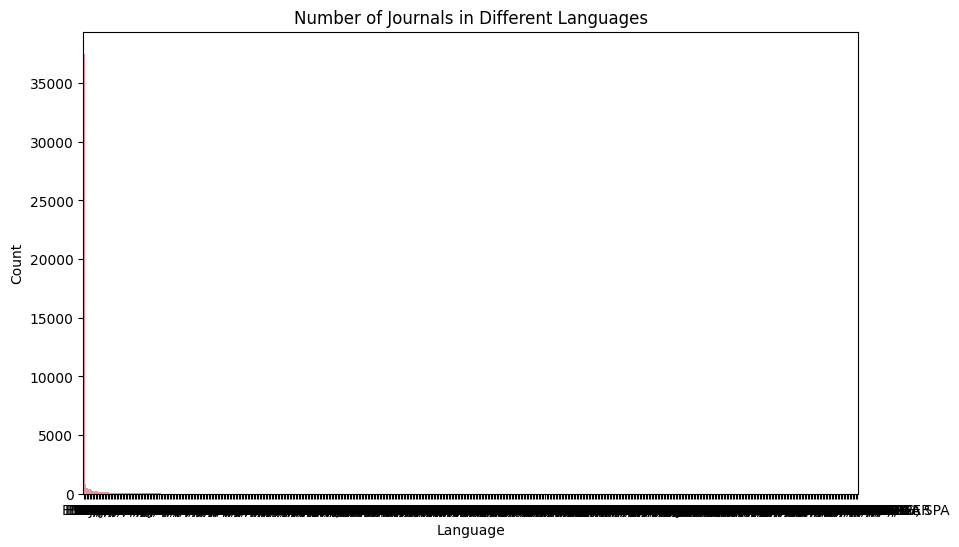

In [249]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title("Number of Journals in Different Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

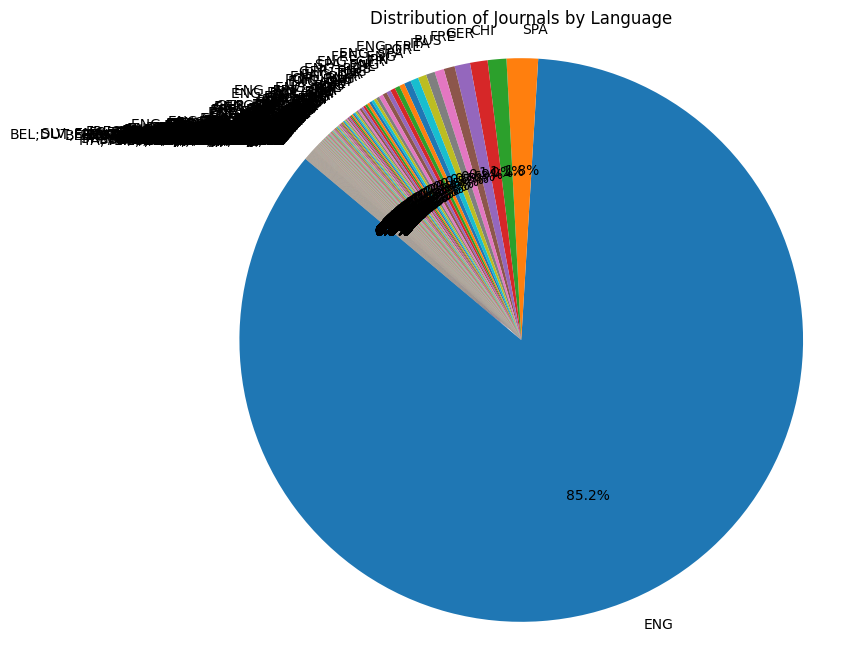

In [254]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Journals by Language")
plt.axis('equal')
plt.show()

###Task04:
Create a dataframe with two fields (Current name & Previous name). These fields should have the names of journal that have changes their names.

In [255]:
data = {
    'Current name': ['Love', 'Hope', 'excitement'],
    'Previous name': ['Anger', 'Sadness', 'Depression']
}

df = pd.DataFrame(data)
df

,Current name,Previous name
0,Love,Anger
1,Hope,Sadness
2,excitement,Depression


###Task05
Use a data visualizaton (pie chart) technique to display top 10 Publishers (number of journals) to show which Publisher has more proportion of the titles. Largest slice of should have green color, 2nd Blue, 3rd Yellow, 4th Magenta, 5th Orange, 6th Sky, 9 pink, 10 red.

In [256]:
publishers = ['Muhammad Ali', 'Fardeen Khan', 'Tanveer', 'Muhammad Muzammil', 'Ameer Hamza', 'Hania', 'Sunaina', 'Muhammad Tayyab', 'Sanam', 'Ali']
titles_count = [50, 40, 35, 30, 25, 20, 18, 15, 12, 10]
colors = ['green', 'blue', 'yellow', 'magenta', 'orange', 'skyblue', 'pink', 'red', 'grey', 'lightgreen']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

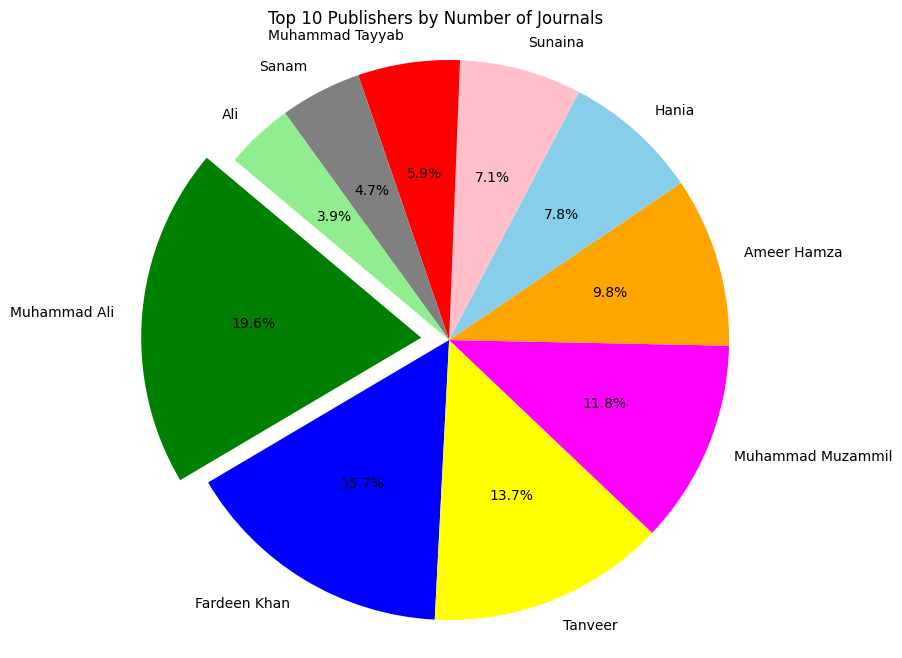

In [259]:
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(titles_count, labels=publishers, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Top 10 Publishers by Number of Journals')
plt.axis('equal')
plt.show()

###Tas05:
This task would use dataset (Assignment01_Dataset02.csv). The manager of Scopus wants to know information from the dataset. The dataset contains info about the journals indexing in different months of 2023 till September. You need to show using visualization to grouping of publishers in each month being able to index their journals in Scopus.

In [260]:
df2 = pd.read_excel('/content/drive/MyDrive/DataScience /DataSets/Assignment01_Dataset02.xlsx')

In [262]:
df2.head()
df2.shape

(1270, 5)

In [264]:
df2 = df2.dropna()

In [288]:
df2['Unnamed: 3']

1        Date of acceptance
2       2023-09-30 18:26:00
4       2023-09-30 16:44:00
10      2023-09-28 10:28:00
12      2023-09-28 09:27:00
               ...         
1255    2022-01-04 10:26:00
1258    2021-11-06 14:39:00
1261    2021-08-19 08:12:00
1264    2021-02-11 22:20:00
1265    2020-09-11 04:36:00
Name: Unnamed: 3, Length: 573, dtype: object

In [314]:
grouped_data = df2.groupby([df2['Unnamed: 3'].dt.month, 'Unnamed: 4']).size().reset_index(name='count')

In [306]:
df2['Unnamed: 3'] = pd.to_datetime(df2['Unnamed: 3'], errors='coerce')

In [313]:
df2.head()

,Status: September 2023,Accepted titles - in the process of being added to Scopus,Unnamed: 2,Unnamed: 3,Unnamed: 4
4,Droplet,27692159,27314375,2023-09-30 16:44:00,Wiley-Blackwell
10,Korean Journal of Mathematics,19768605,22881433,2023-09-28 10:28:00,The Kangwon-Kyungki Mathematical Society
12,Mathematics and Education in Mathematics,13133330,28154002,2023-09-28 09:27:00,Union of Bulgarian Mathematicians
18,Dental Anthropology,10969411,2769822X,2023-09-27 11:18:00,OpenJournals Publishing
19,Revista de Estudios en Derecho a la Informacion,26832038,25940082,2023-09-26 12:40:00,Universidad Nacional Autonoma de Mexico


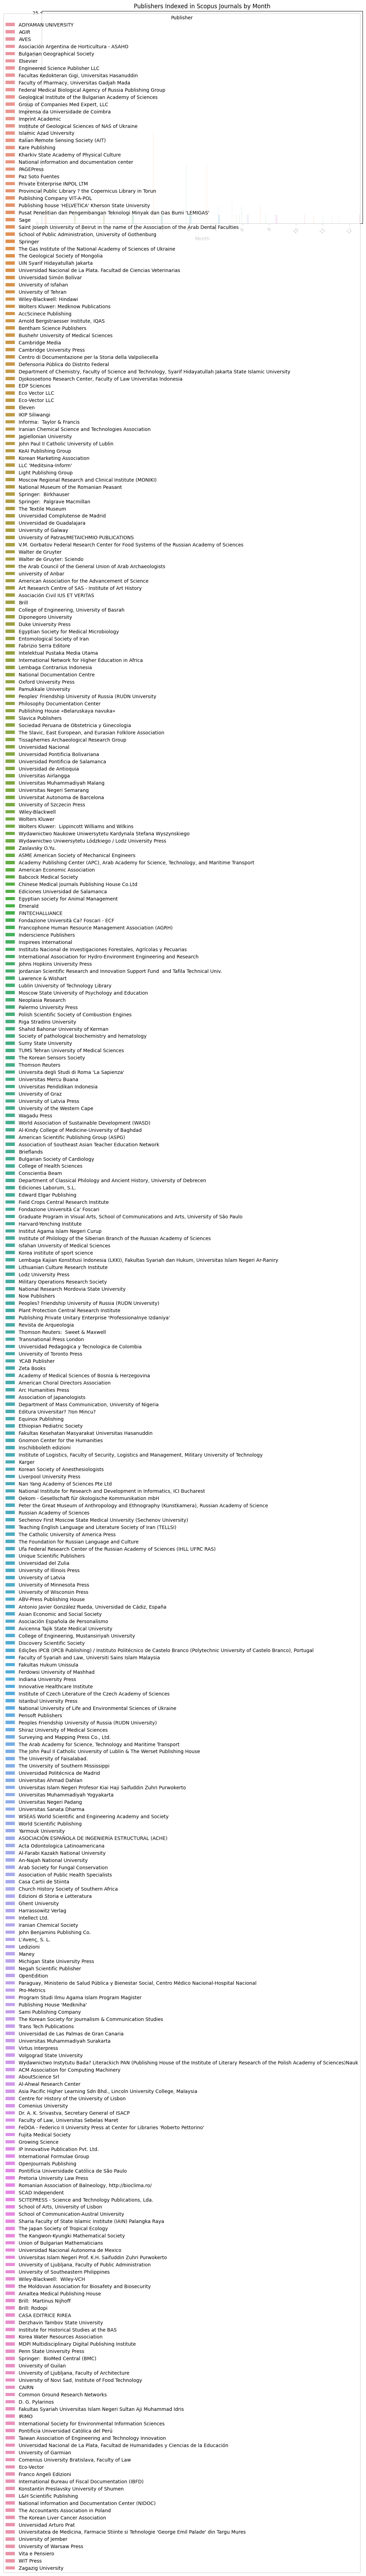

In [315]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Unnamed: 3', y='count', hue='Unnamed: 4', data=grouped_data)
plt.title('Publishers Indexed in Scopus Journals by Month')
plt.xlabel('Month')
plt.ylabel('Count of Journals')
plt.xticks(rotation=45)
plt.legend(title='Publisher', loc='upper right')
plt.show()


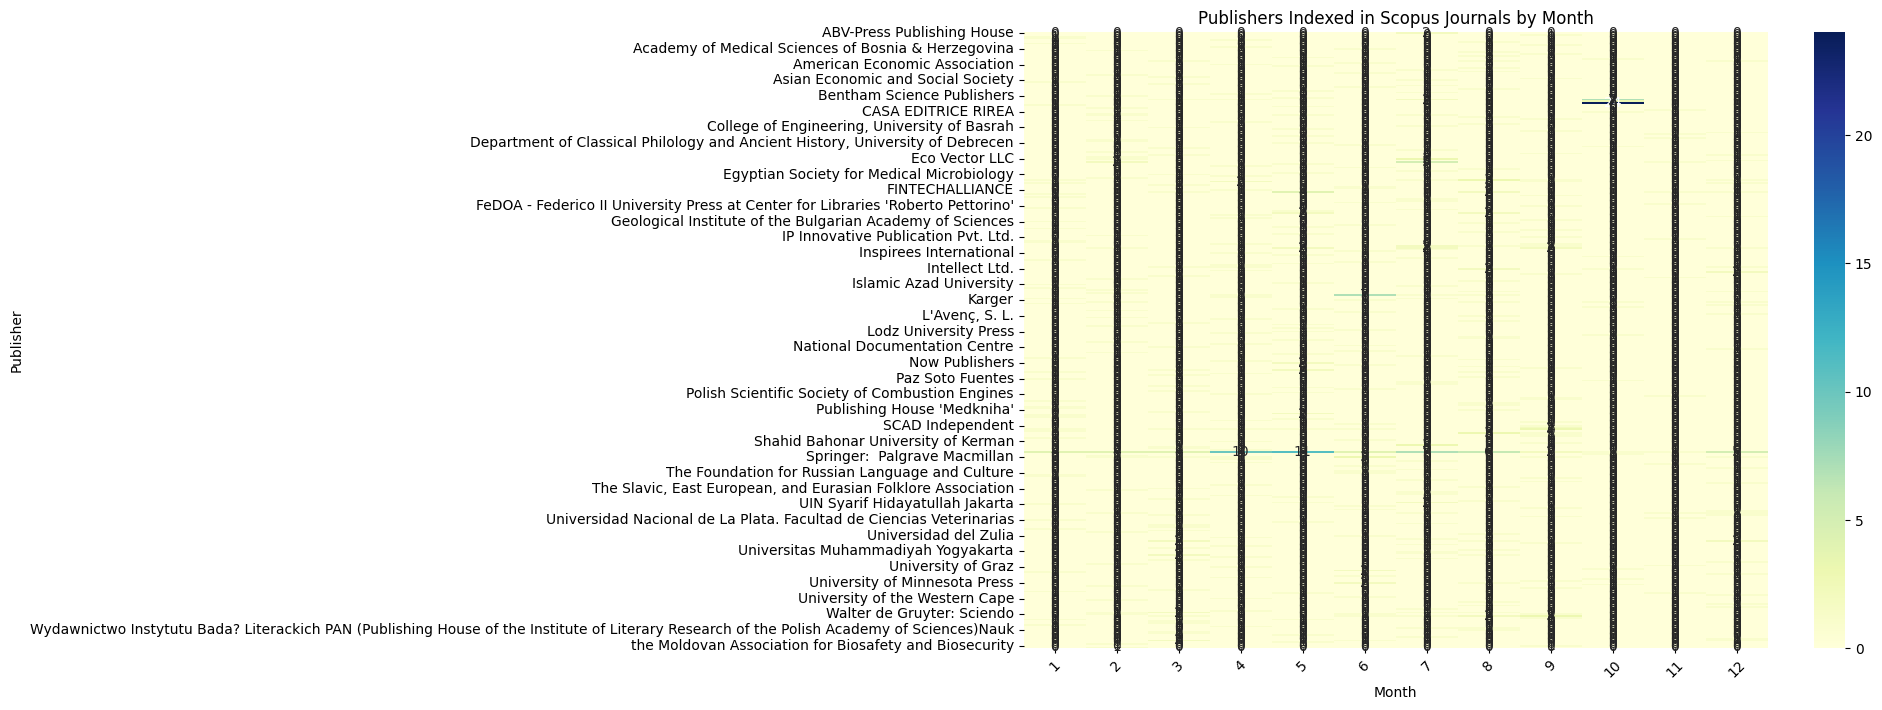

In [316]:
pivot_table = grouped_data.pivot_table(index='Unnamed: 4', columns='Unnamed: 3', values='count', fill_value=0)

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Publishers Indexed in Scopus Journals by Month')
plt.xlabel('Month')
plt.ylabel('Publisher')
plt.xticks(rotation=45)
plt.show()